In [1]:
#inports
import time
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import requests
import datetime
import pickle
import os.path
import csv

/home/nnaemeka/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/nnaemeka/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#read the csv file. The file is lib.csv in our case.
# some explanation

#post: referes to either the article posted by the blogger or comments on articles. Post ID column has been used to 
# distinguish artcle from comments. 

#Like and Dislike columns: the value of -1 has been assigned to artcles posted by the blogger. 
# I used the code -1 to avoid assigning null values to articles since articles in the blog 
# doesn't have likes/dislike tabs
df = pd.read_csv("lib2.csv",encoding='utf8', engine='python',sep='\\')
df

,Title,Username,Post,Time,Post ID,Likes,Dislikes,Link
0,"The Chief Justice, National Judicial Council, ...",Linda Ikeji,The former Director General of the Bureau of...,2019-01-26 08:55:00,article,-1,-1,https://www.lindaikejisblog.com/2019/1/the-chi...
1,"The Chief Justice, National Judicial Council, ...",Anonymous,"They are yet to reveal the real truth, I’m sus...",2019-01-26 08:55:00,comment,0,0,https://www.lindaikejisblog.com/2019/1/the-chi...
2,"The Chief Justice, National Judicial Council, ...",Samuelm,Am offed.,2019-01-26 08:55:00,comment,0,0,https://www.lindaikejisblog.com/2019/1/the-chi...
3,Beyonce flaunts her cleavage as she poses in a...,Linda Ikeji,"Pop Queen, Beyonce looked gorgeous as ever i...",2019-01-26 08:53:00,article,-1,-1,https://www.lindaikejisblog.com/2019/1/beyonce...
4,Beyonce flaunts her cleavage as she poses in a...,Samuelm,Baby la hot,2019-01-26 08:53:00,comment,0,0,https://www.lindaikejisblog.com/2019/1/beyonce...
5,Beyonce flaunts her cleavage as she poses in a...,Anonymous,So is this news......,2019-01-26 08:53:00,comment,0,0,https://www.lindaikejisblog.com/2019/1/beyonce...
6,Fayose describes President Buhari as Adolf Hit...,Linda Ikeji,As he shared on his twitter handle.,2019-01-26 08:52:00,article,-1,-1,https://www.lindaikejisblog.com/2019/1/fayose-...
7,Fayose describes President Buhari as Adolf Hit...,Samuel,Omoge sit down joor,2019-01-26 08:52:00,comment,0,0,https://www.lindaikejisblog.com/2019/1/fayose-...
8,Fayose describes President Buhari as Adolf Hit...,Anonymous,I know some foolish people will begin to casti...,2019-01-26 08:52:00,comment,0,0,https://www.lindaikejisblog.com/2019/1/fayose-...
9,Kanye West sues Jay-Z's Roc-A-Fella Records,Linda Ikeji,Kanye West has reportedly filed a lawsuit ag...,2019-01-26 08:52:00,article,-1,-1,https://www.lindaikejisblog.com/2019/1/kanye-w...


In [3]:
#converts the likes, dislikes to numeric entry
df['Likes'] = pd.to_numeric(df['Likes'],errors="coerce",downcast = "integer")
df['Likes'] = pd.to_numeric(df['Likes'],errors="coerce",downcast = "integer")
df.reset_index()
df

,Title,Username,Post,Time,Post ID,Likes,Dislikes,Link
0,"The Chief Justice, National Judicial Council, ...",Linda Ikeji,The former Director General of the Bureau of...,2019-01-26 08:55:00,article,-1,-1,https://www.lindaikejisblog.com/2019/1/the-chi...
1,"The Chief Justice, National Judicial Council, ...",Anonymous,"They are yet to reveal the real truth, I’m sus...",2019-01-26 08:55:00,comment,0,0,https://www.lindaikejisblog.com/2019/1/the-chi...
2,"The Chief Justice, National Judicial Council, ...",Samuelm,Am offed.,2019-01-26 08:55:00,comment,0,0,https://www.lindaikejisblog.com/2019/1/the-chi...
3,Beyonce flaunts her cleavage as she poses in a...,Linda Ikeji,"Pop Queen, Beyonce looked gorgeous as ever i...",2019-01-26 08:53:00,article,-1,-1,https://www.lindaikejisblog.com/2019/1/beyonce...
4,Beyonce flaunts her cleavage as she poses in a...,Samuelm,Baby la hot,2019-01-26 08:53:00,comment,0,0,https://www.lindaikejisblog.com/2019/1/beyonce...
5,Beyonce flaunts her cleavage as she poses in a...,Anonymous,So is this news......,2019-01-26 08:53:00,comment,0,0,https://www.lindaikejisblog.com/2019/1/beyonce...
6,Fayose describes President Buhari as Adolf Hit...,Linda Ikeji,As he shared on his twitter handle.,2019-01-26 08:52:00,article,-1,-1,https://www.lindaikejisblog.com/2019/1/fayose-...
7,Fayose describes President Buhari as Adolf Hit...,Samuel,Omoge sit down joor,2019-01-26 08:52:00,comment,0,0,https://www.lindaikejisblog.com/2019/1/fayose-...
8,Fayose describes President Buhari as Adolf Hit...,Anonymous,I know some foolish people will begin to casti...,2019-01-26 08:52:00,comment,0,0,https://www.lindaikejisblog.com/2019/1/fayose-...
9,Kanye West sues Jay-Z's Roc-A-Fella Records,Linda Ikeji,Kanye West has reportedly filed a lawsuit ag...,2019-01-26 08:52:00,article,-1,-1,https://www.lindaikejisblog.com/2019/1/kanye-w...


In [4]:
#remove null "title" and "post" columns. due to some reason, some post returns null title and comments. 
# But since the such posts are few (~ 500 of a total of 1 million posts/comments), it won't affect the data we have
# in future work, the post that does such will be analyzed and accommodated in the script. 
# converts time to pandas datetime
df = df[(df['Title'].notnull() | df['Post'].notnull())]
df.Time = pd.to_datetime(df.Time)
df

,Title,Username,Post,Time,Post ID,Likes,Dislikes,Link
0,"The Chief Justice, National Judicial Council, ...",Linda Ikeji,The former Director General of the Bureau of...,2019-01-26 08:55:00,article,-1,-1,https://www.lindaikejisblog.com/2019/1/the-chi...
1,"The Chief Justice, National Judicial Council, ...",Anonymous,"They are yet to reveal the real truth, I’m sus...",2019-01-26 08:55:00,comment,0,0,https://www.lindaikejisblog.com/2019/1/the-chi...
2,"The Chief Justice, National Judicial Council, ...",Samuelm,Am offed.,2019-01-26 08:55:00,comment,0,0,https://www.lindaikejisblog.com/2019/1/the-chi...
3,Beyonce flaunts her cleavage as she poses in a...,Linda Ikeji,"Pop Queen, Beyonce looked gorgeous as ever i...",2019-01-26 08:53:00,article,-1,-1,https://www.lindaikejisblog.com/2019/1/beyonce...
4,Beyonce flaunts her cleavage as she poses in a...,Samuelm,Baby la hot,2019-01-26 08:53:00,comment,0,0,https://www.lindaikejisblog.com/2019/1/beyonce...
5,Beyonce flaunts her cleavage as she poses in a...,Anonymous,So is this news......,2019-01-26 08:53:00,comment,0,0,https://www.lindaikejisblog.com/2019/1/beyonce...
6,Fayose describes President Buhari as Adolf Hit...,Linda Ikeji,As he shared on his twitter handle.,2019-01-26 08:52:00,article,-1,-1,https://www.lindaikejisblog.com/2019/1/fayose-...
7,Fayose describes President Buhari as Adolf Hit...,Samuel,Omoge sit down joor,2019-01-26 08:52:00,comment,0,0,https://www.lindaikejisblog.com/2019/1/fayose-...
8,Fayose describes President Buhari as Adolf Hit...,Anonymous,I know some foolish people will begin to casti...,2019-01-26 08:52:00,comment,0,0,https://www.lindaikejisblog.com/2019/1/fayose-...
9,Kanye West sues Jay-Z's Roc-A-Fella Records,Linda Ikeji,Kanye West has reportedly filed a lawsuit ag...,2019-01-26 08:52:00,article,-1,-1,https://www.lindaikejisblog.com/2019/1/kanye-w...


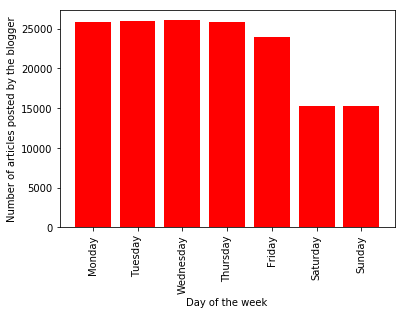

In [5]:
import calendar
pd.options.mode.chained_assignment = None  # dissables some false positive warning
df2 = df.groupby("Likes").get_group(-1) # Gets blogger article. 
#df2 = df[(df.Likes != -1)] # Gets the comments instead
df2["Time"] = pd.to_datetime(df2["Time"])
df2['day_of_week'] = df2['Time'].apply(lambda x: x.weekday()) # get the weekday index, between 0 and 6
df2['day_of_week'] = df2['day_of_week'].apply(lambda x: calendar.day_name[x])
df3 = df2.groupby("day_of_week")
#df2.sort_values(by='day_of_week', ascending=False,inplace=True)
weekdays = df3.groups.keys()
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# Now, generate a frequency distribution
freq = []
for i in days:
    if i in weekdays:
        freq.append(len(df3.get_group(i)))
plt.bar(days,freq,color ='r')
plt.xlabel("Day of the week")
plt.ylabel("Number of articles posted by the blogger")
plt.xticks(rotation=90)
plt.show()

### It can be seen that fewer articles are posted on weekends (Saturday and Sunday).
### Obviously, the blogger either have a social or family life. Thus less active on weekends.

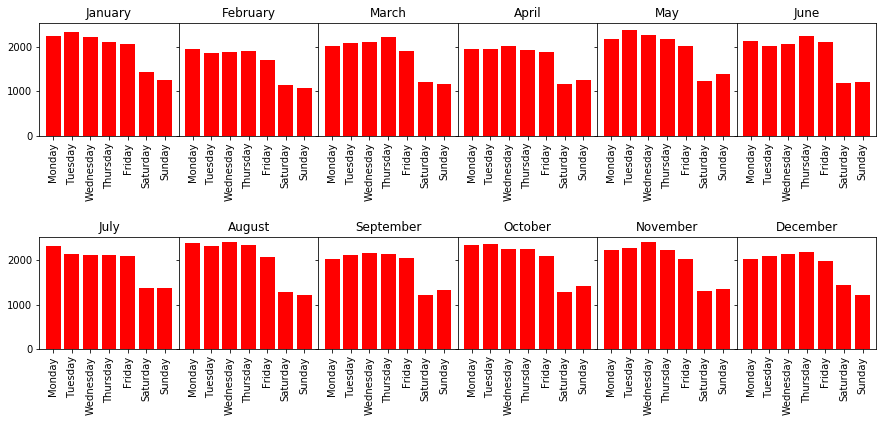

In [6]:
# Now, let's find number of articles posted each days of the week for each month of the year.
def get_day_of_the_week_articles_number(df):
    df1 = df.groupby("day_of_week")
    weekdays = df1.groups.keys()
    days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
    freq = []
    for i in days:
        if i in weekdays:
            freq.append(len(df1.get_group(i)))
            #print(i,len(df.get_group(i)))
    #print(freq)
    return(days,freq)

import calendar
df2 = df.groupby("Likes").get_group(-1)
#df2 = df[(df.Likes != -1)] # Gets the comments instead
df2["Time"] = pd.to_datetime(df2["Time"])
df2['month'] = df2.Time.dt.month
df2['day_of_week'] = df2['Time'].apply(lambda x: x.weekday()) # get the weekday index, between 0 and 6
df2['day_of_week'] = df2['day_of_week'].apply(lambda x: calendar.day_name[x])
grouped = df2.groupby("month")
days = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
freq = []
total = 0
for i in grouped.groups.keys():
    month_df = grouped.get_group(i)
    #print(month_df)
    days_,freq_ = get_day_of_the_week_articles_number(month_df)
    freq.append(freq_)
    total+=sum(freq_)
#print(freq)
# now plots them
fig, axs = plt.subplots(2,6, figsize=(15, 6), facecolor='w', edgecolor='k',sharey=True)
fig.subplots_adjust(hspace = .9, wspace=.001)
axs = axs.ravel()
months_name = list(calendar.month_name[1:]) # gets months names
for i,j in zip(range(len(freq)),freq):
    #print(days,j)
    axs[i].bar(days,j,color = 'r')
    axs[i].set_title(months_name[i])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

### It can be seen that in each month the number of articles posted by the blogger is fewest on weekends. 
### One would normally expect the blogger to post more articles on weekend since it is on the weekends 
### that people should have time to read blog posts more. Obviously, the blogger takes some rest on weekends.

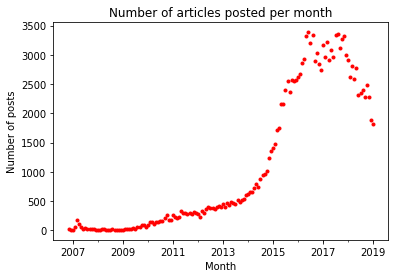

In [7]:
#evolution of number of articles posted per month
#%matplotlib notebook
df2 = df.groupby("Likes").get_group(-1)
post_per_month = df2['Time'].groupby(df2.Time.dt.to_period("M")).agg('count')
post_per_month.plot(style = ".",color = 'r')
plt.title("Number of articles posted per month")
plt.xlabel("Month")
plt.ylabel("Number of posts")
plt.show()

## As could be seen, the number of articles posted per month peaked between 2016 - 2018. It is now declining

<IPython.core.display.Javascript object>


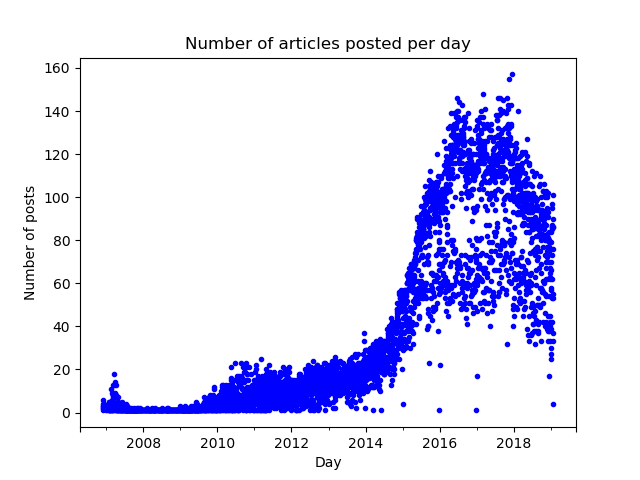

In [20]:
# evolution of number of articles posted per day
%matplotlib notebook
post_per_day = df2['Time'].groupby(df2.Time.dt.to_period("D")).agg('count')
post_per_day.plot(style = ".",color='b')
plt.title("Number of articles posted per day")
plt.xlabel("Day")
plt.ylabel("Number of posts")
plt.show()

<IPython.core.display.Javascript object>


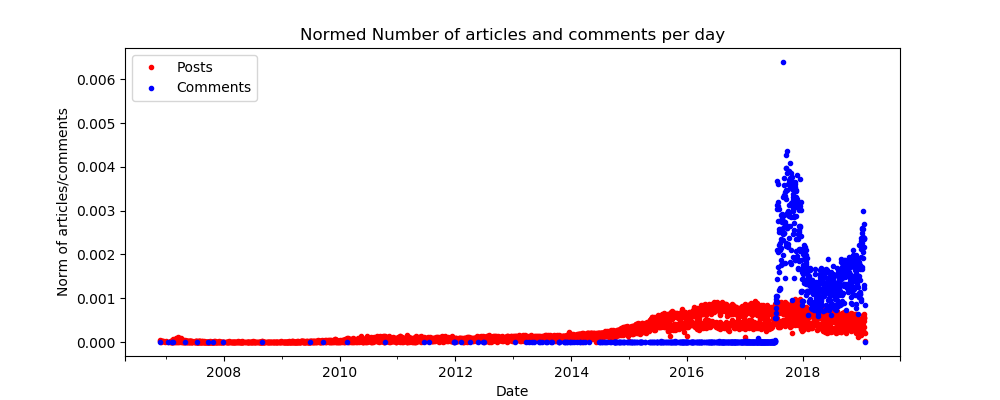

In [18]:
#Evolution of normed daily number of articles posted and comments
daily_posts = post_per_day.to_frame(name = ("Count")).reset_index()
daily_posts["Norm"] = daily_posts.Count/daily_posts.Count.sum()
total = daily_posts.Count.sum()
daily_posts.drop("Count",axis = 1, inplace=True)
daily_posts.set_index('Time', inplace=True)

daily_comments = comments_per_day.to_frame(name = ("Count")).reset_index()
daily_comments["Norm"] = daily_comments.Count/daily_comments.Count.sum()
total = daily_comments.Count.sum()
daily_comments.drop("Count",axis = 1, inplace=True)
daily_comments.set_index('Time', inplace=True)

%matplotlib notebook
ax = daily_posts.plot(style = ".",color='r')
daily_comments.plot(ax=ax,style = ".",color='b',figsize=(10,4))
plt.title("Normed Number of articles and comments per day")
plt.xlabel("Date")
plt.ylabel("Norm of articles/comments")
plt.legend(["Posts","Comments"])
plt.show()

<IPython.core.display.Javascript object>


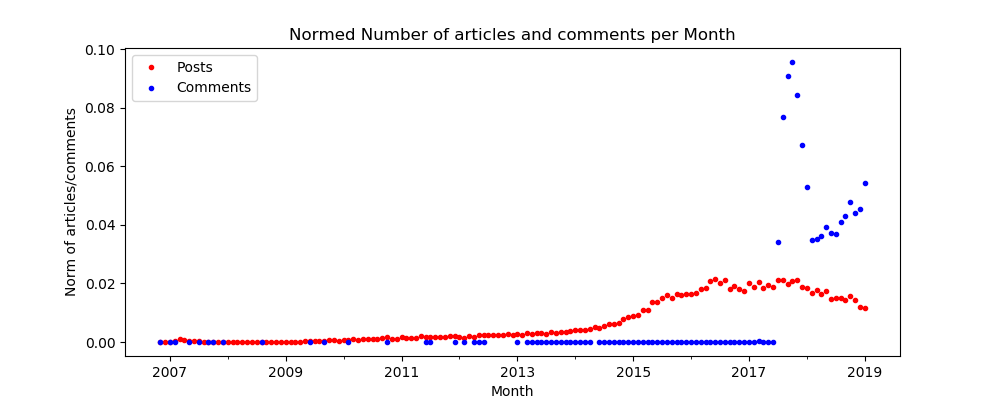

In [19]:
#Evolution of normed monthly number of articles and comments posted per month.
monthly_posts = post_per_month.to_frame(name = ("Count")).reset_index()
monthly_posts["Norm"] = monthly_posts.Count/monthly_posts.Count.sum()
total = monthly_posts.Count.sum()
monthly_posts.drop("Count",axis = 1, inplace=True)
monthly_posts.set_index('Time', inplace=True)

monthly_comments = comments_per_month.to_frame(name = ("Count")).reset_index()
monthly_comments["Norm"] = monthly_comments.Count/monthly_comments.Count.sum()
total = monthly_comments.Count.sum()
monthly_comments.drop("Count",axis = 1, inplace=True)
monthly_comments.set_index('Time', inplace=True)

%matplotlib notebook
ax = monthly_posts.plot(figsize=(10,4),style = ".",color='r')
monthly_comments.plot(ax=ax,style = ".",color='b')
#ax = monthly_posts.plot(figsize=(10,4),color='r')
#monthly_comments.plot(ax=ax,color='b')
plt.title("Normed Number of articles and comments per Month")
plt.xlabel("Month")
plt.ylabel("Norm of articles/comments")
plt.legend(["Posts","Comments"])
plt.show()

## Expectedly, there is correlation between article posted and comments